In [ ]:
%reset -f

In [81]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedKFold
from math import sqrt
from scipy import stats
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, learning_curve
# import ifsg
import json
import re
import glob, os #I ADDED
from sklearn.svm import SVR, LinearSVR #I ADDED
from sklearn.tree import DecisionTreeRegressor #I ADDED

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [ ]:
x=os.path.splitext(os.path.split(os.path.splitext(os.path.split(os.getcwd())[0])[0])[0])
path_dataset=str(x[0])+os.sep+"Data"+os.sep+ "Datasets"

print(path_dataset)

In [82]:
file = "W:\\Work\\Assense\\ML\\DataFrames\\sjt2_df_14_03_19.json"
with open(file) as train_file:
    dict_train = json.load(train_file)
sol=[]
# converting json dataset from dictionary to dataframe
df = pd.DataFrame.from_dict(dict_train)
print(df.shape)
#df.iloc[[5]]

df.head()

print(df.columns)

(106, 68)
Index(['pzl.site_name.0', 'pzl.stress.3', 'pzl.stress.0', 'pzl.stress.2',
       'pzl.stress.1', 'sjt2.SJTRoundUserQuestions.4',
       'sjt2.SJTRoundUserAnswers.10', 'sjt2.SJTRoundUserAnswersString.16',
       'sjt2.SJTRoundUserAnswers.12', 'sjt2.SJTRoundUserAnswersString.7',
       'sjt2.SJTRoundUserAnswersString.19', 'sjt2.SJTRoundUserQuestions.19',
       'sjt2.SJTRoundUserAnswers.1', 'sjt2.SJTRoundUserAnswers.17',
       'sjt2.SJTRoundUserAnswers.18', 'sjt2.SJTRoundUserAnswersString.5',
       'sjt2.SJTRoundUserQuestions.1', 'sjt2.SJTRoundUserQuestions.3',
       'sjt2.SJTRoundUserAnswers.13', 'sjt2.SJTRoundUserAnswers.8',
       'sjt2.SJTRoundUserAnswers.4', 'sjt2.SJTRoundUserQuestions.2',
       'sjt2.SJTRoundUserQuestions.12', 'sjt2.SJTRoundUserAnswers.6',
       'sjt2.SJTRoundUserAnswersString.2', 'sjt2.SJTRoundUserQuestions.0',
       'sjt2.SJTRoundUserQuestions.18', 'sjt2.SJTRoundUserQuestions.15',
       'sjt2.SJTRoundUserAnswers.9', 'sjt2.SJTRoundUserAnswersStrin

In [83]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]


In [84]:
# new version grades
sol = []
for col in list(df.columns):
    if re.search("sjt2\.SJTRoundUserAnswers\..*", col):
        sol.append(col)

sol.sort(key=natural_keys)
       
df1= df[sol]

df1.head()                       


,sjt2.SJTRoundUserAnswers.0,sjt2.SJTRoundUserAnswers.1,sjt2.SJTRoundUserAnswers.2,sjt2.SJTRoundUserAnswers.3,sjt2.SJTRoundUserAnswers.4,sjt2.SJTRoundUserAnswers.5,sjt2.SJTRoundUserAnswers.6,sjt2.SJTRoundUserAnswers.7,sjt2.SJTRoundUserAnswers.8,sjt2.SJTRoundUserAnswers.9,sjt2.SJTRoundUserAnswers.10,sjt2.SJTRoundUserAnswers.11,sjt2.SJTRoundUserAnswers.12,sjt2.SJTRoundUserAnswers.13,sjt2.SJTRoundUserAnswers.14,sjt2.SJTRoundUserAnswers.15,sjt2.SJTRoundUserAnswers.16,sjt2.SJTRoundUserAnswers.17,sjt2.SJTRoundUserAnswers.18,sjt2.SJTRoundUserAnswers.19,sjt2.SJTRoundUserAnswers.20
00373658,3.0,4.0,4.0,3.0,2.0,4.0,1.0,2.0,6.0,7.0,2.0,4.0,3.0,4.5,2.9,2.5,3.5,1.0,3.0,69.0,90.0
01348054,2.0,4.0,3.0,3.0,3.0,2.0,1.0,2.0,1.0,1.0,4.0,4.0,2.0,4.1,4.0,1.2,2.1,2.0,3.0,70.0,85.0
02718050,3.0,2.0,3.0,3.0,4.0,2.0,1.0,1.0,4.0,4.0,2.0,2.0,3.0,3.0,3.9,2.0,2.0,3.0,4.0,41.0,92.0
04269150,4.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0,4.0,4.0,6.0,4.0,3.0,4.5,4.5,2.2,3.7,1.0,4.0,100.0,100.0
04395124,2.0,1.0,3.0,1.0,2.0,3.0,1.0,4.0,4.0,4.0,2.0,4.0,3.0,4.6,1.8,1.8,2.3,3.0,4.0,86.0,75.0


In [87]:
plt.figure(figsize=(20,30))
# new version grades
q = []
for col in list(df.columns):
    if re.search("sjt2\.SJTRoundUserQuestions\..*", col):
        q.append(col)

q.sort(key=natural_keys)  
df2= df[q]
# print(df2)
# for col in df2.columns:
#     print(col)
#     df2[col].hist()
#     plt.show()

<Figure size 1440x2160 with 0 Axes>

sjt2.SJTRoundUserAnswers.0


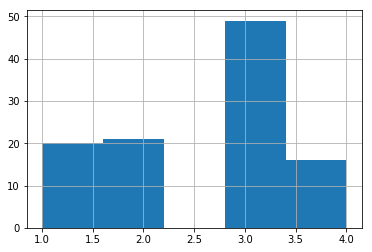

sjt2.SJTRoundUserAnswers.1


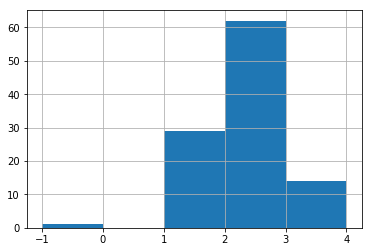

sjt2.SJTRoundUserAnswers.2


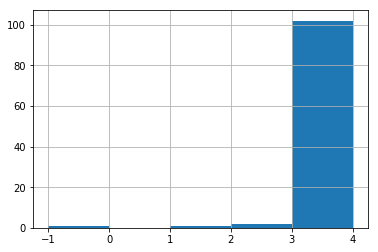

sjt2.SJTRoundUserAnswers.3


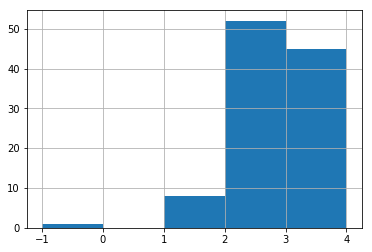

sjt2.SJTRoundUserAnswers.4


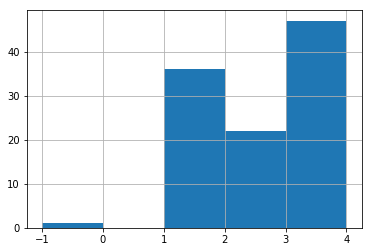

sjt2.SJTRoundUserAnswers.5


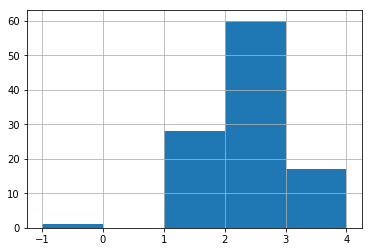

sjt2.SJTRoundUserAnswers.6


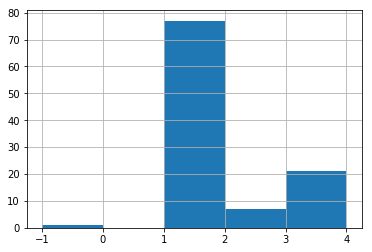

sjt2.SJTRoundUserAnswers.7


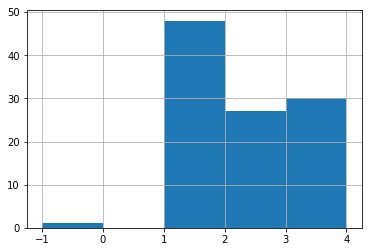

sjt2.SJTRoundUserAnswers.8


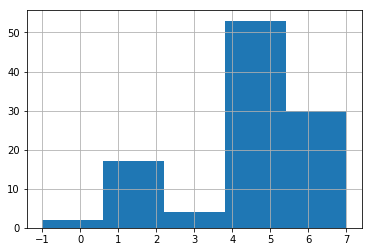

sjt2.SJTRoundUserAnswers.9


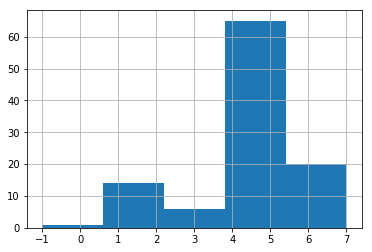

sjt2.SJTRoundUserAnswers.10


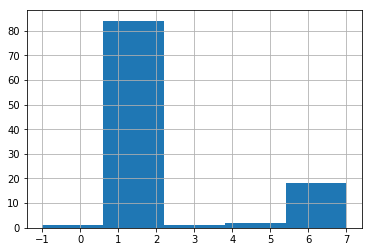

sjt2.SJTRoundUserAnswers.11


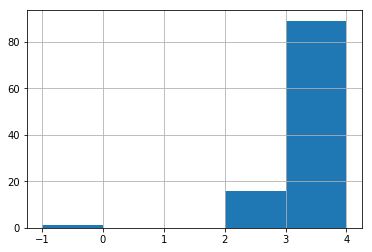

sjt2.SJTRoundUserAnswers.12


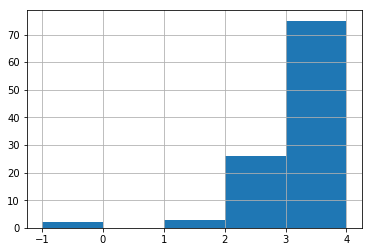

sjt2.SJTRoundUserAnswers.13


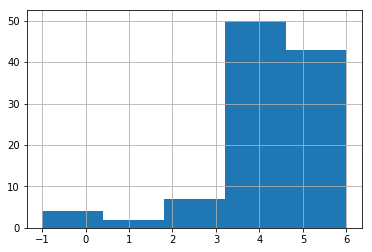

sjt2.SJTRoundUserAnswers.14


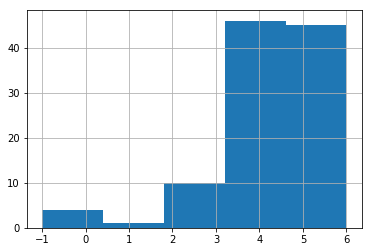

sjt2.SJTRoundUserAnswers.15


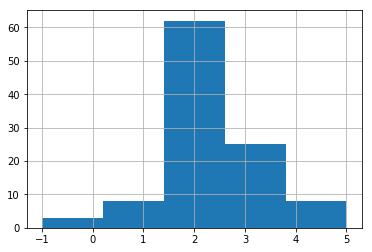

sjt2.SJTRoundUserAnswers.16


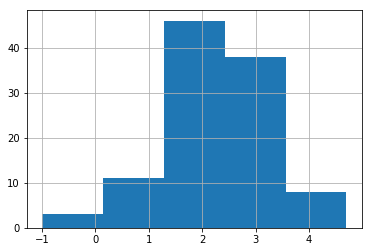

sjt2.SJTRoundUserAnswers.17


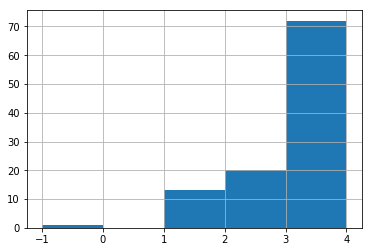

sjt2.SJTRoundUserAnswers.18


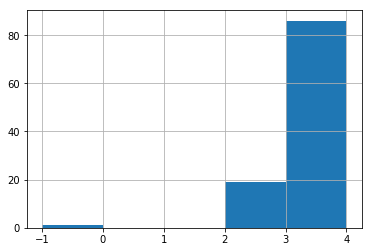

sjt2.SJTRoundUserAnswers.19


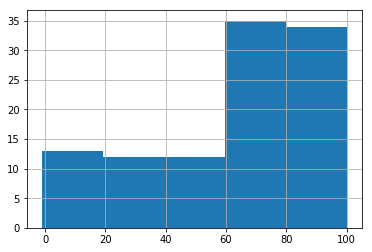

sjt2.SJTRoundUserAnswers.20


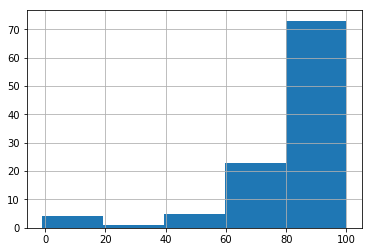

In [90]:
# answers scores
for col in df1.columns:
    print(col)
    df1[col].hist(bins =5)
    plt.show()